<a href="https://colab.research.google.com/github/Ankit4371/Machine-Learning-Notebooks/blob/main/Spam%20Classifier%20with%205%20different%20Classification%20Models/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Spam Classifier with different Classifier Models

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

In [71]:
data = pd.read_csv("emails.csv")

In [72]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


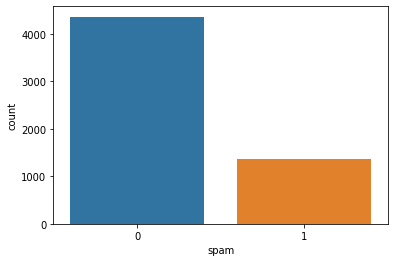

In [73]:
sns.countplot(x = 'spam',data = data)

In [74]:
data.columns

Index(['text', 'spam'], dtype='object')

In [75]:
X= data['text']
Y = data['spam']

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size = 0.3, random_state = 8)

Count Vectorizer

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
spam_fill = CountVectorizer(stop_words='english')


In [78]:
X_train = spam_fill.fit_transform(X_train).toarray()
X_test = spam_fill.transform(X_test).toarray()

In [79]:
print(spam_fill.get_feature_names())

['00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012736', '000000000012741', '000000000012987', '000000000013085', '000000000015793', '000000000025307', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '0009249506', '001', '0011', '0015', '002', '00225', '00235424', '002813', '0029', '003', '0031', '003399', '00343938', '004', '0044', '00453', '005', '0052', '0054', '0057', '006', '0061', '007', '0080', '01', '010', '0100', '01019', '0102', '0107', '01075', '0109', 

1. K Nearest Neighbours Classification

In [80]:
from sklearn.neighbors import KNeighborsClassifier
kNC = KNeighborsClassifier(n_neighbors = 5)
kNC.fit(X_train,Y_train)
prediction_kNC = kNC.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,prediction_kNC))

0.8993600930773705


2. Gaussian Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB
gNB = GaussianNB()
gNB.fit(X_train,Y_train)
prediction_gNB = gNB.predict(X_test)


In [83]:
print(accuracy_score(prediction_gNB,Y_test))

0.9569517161140197


In [84]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prediction_gNB,Y_test))

[[1284   53]
 [  21  361]]


3. Decision Trees

In [85]:
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
DC.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [86]:
prediction_DC = DC.predict(X_test)
print(accuracy_score(prediction_DC,Y_test))

0.9680046538685282


4. Random Forest Classification

In [87]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state =0)
RFC.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [88]:
prediction_RFC = RFC.predict(X_test)
print(accuracy_score(prediction_RFC,Y_test))

0.9668411867364747


5. Support Vector Machine Classification

In [69]:
from sklearn.svm import SVC
SV = SVC(kernel = 'linear',random_state =0)
SV.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
prediction_SV = SV.predict(X_test)
print(accuracy_score(prediction_SV,Y_test))

0.9872018615474113


In [90]:
print(confusion_matrix(prediction_SV,Y_test))

[[1292    9]
 [  13  405]]


We got best results for SVM on this data.